In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/CS542 Project/data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
X=data.drop(labels=['Bankrupt?'], axis=1)
y=data['Bankrupt?']

In [ ]:
data['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

# Preprocessing and Visualization

In [ ]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

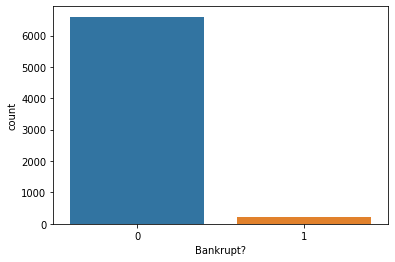

In [ ]:
import seaborn as sns
sns.countplot(x=y)

# Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
train_X, rem_X, train_y, rem_y = train_test_split(X, y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size = 0.5 (that is 50% of remaining data)
valid_X, test_X, y_valid, y_test = train_test_split(rem_X, rem_y, test_size=0.5)

print(train_X.shape), print(train_y.shape)
print(valid_X.shape), print(y_valid.shape)
print(test_X.shape), print(y_test.shape)

(5455, 95)
(5455,)
(682, 95)
(682,)
(682, 95)
(682,)


(None, None)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale_train=scaler.fit_transform(train_X)
X_scale_valid=scaler.fit_transform(valid_X)
X_scale_test=scaler.fit_transform(test_X)
print(X_scale_train.shape)
print(X_scale_valid.shape)
print(X_scale_test.shape)

(5455, 95)
(682, 95)
(682, 95)


Validate PCA - Choose the best number of components

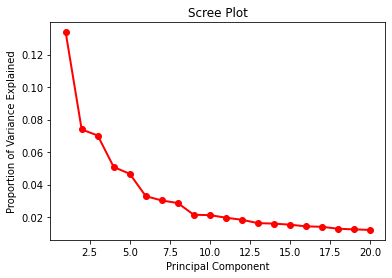

Proportion of Variance Explained :  [0.133783   0.07393166 0.0702306  0.05080004 0.04665728 0.03290042
 0.030231   0.02865194 0.02142379 0.02122445 0.01965476 0.0183531
 0.01630591 0.01600546 0.01534257 0.01430826 0.01405015 0.01284531
 0.01245824 0.01211979]
Cumulative Prop. Variance Explained:  [0.133783   0.20771466 0.27794526 0.3287453  0.37540258 0.408303
 0.43853399 0.46718594 0.48860973 0.50983418 0.52948894 0.54784203
 0.56414795 0.5801534  0.59549597 0.60980424 0.62385439 0.6366997
 0.64915795 0.66127774]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca1 = PCA(n_components=20)
Principal_components=pca1.fit_transform(X_scale_train)

PC_values = np.arange(pca1.n_components_) + 1
plt.plot(PC_values, pca1.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

print ("Proportion of Variance Explained : ", pca1.explained_variance_ratio_)
out_sum = np.cumsum(pca1.explained_variance_ratio_)
print ("Cumulative Prop. Variance Explained: ", out_sum)


Choose best K features

In [ ]:
#from sklearn.feature_selection import mutual_info_classif
#mi = mutual_info_classif(train_X, train_y)
#mi
#mi = pd.Series(mi)
#mi.index = train_X.columns
#mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
#plt.ylabel('Mutual Information')

In [ ]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def feature_extraction(method: np.ndarray = None):
    sns.countplot(x=train_y)
    if method == "PCA":
        pca = PCA(n_components=6)
        X_train = pca.fit_transform(X_scale_train)
        X_valid = pca.fit_transform(X_scale_valid)
        X_test = pca.fit_transform(X_scale_test)
    if method == "SelectKBest":
        feature_selection=SelectKBest(mutual_info_classif,k=5).fit(train_X,train_y)
        selected_features=X.columns[feature_selection.get_support()]
        print(selected_features)
        Xreduced_train = train_X[selected_features]
        Xreduced_valid = valid_X[selected_features]
        Xreduced_test = test_X[selected_features]
        X_train = scaler.fit_transform(Xreduced_train)
        X_valid = scaler.fit_transform(Xreduced_valid)
        X_test = scaler.fit_transform(Xreduced_test)
    if method == "LDA":
        lda = LinearDiscriminantAnalysis(n_components=1)
        X_train = lda.fit(X_scale_train, train_y).transform(X_scale_train)
        X_valid = lda.fit(X_scale_valid, y_valid).transform(X_scale_valid)
        X_test = lda.fit(X_scale_test, y_test).transform(X_scale_test)
    return X_train, X_valid, X_test

Index([' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity'],
      dtype='object')

(5455, 5)
(682, 5)
(682, 5)


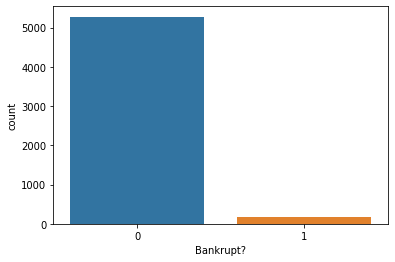

In [ ]:
X_train_imbal, X_valid, X_test = feature_extraction("SelectKBest")
print()
print(X_train_imbal.shape)
print(X_valid.shape)
print(X_test.shape)

Solve imbalance using smote

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_imbal, train_y)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(10558, 6)
(10558,)
(682, 6)
(682,)
(682, 6)
(682,)


(None, None)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#using logistic regression to classify
classifier_lr = LogisticRegression(random_state = 0, max_iter=1000).fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
print("Logistic Regression Predictions: ")
print(y_pred_lr)
print("Length: ", len(y_pred_lr))

Logistic Regression Predictions: 
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1

In [ ]:
from sklearn import metrics

#calculating performance metrics
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
f1_lr = metrics.f1_score(y_test, y_pred_lr)
print("Logistic Regression Performance Metrics")
print(f"Accuracy score: {acc_lr}")
print(f"F1 score: {f1_lr}")

Logistic Regression Performance Metrics
Accuracy score: 0.9002932551319648
F1 score: 0.3333333333333333


Normalized Confusion Matrix: 
[[0.87536657 0.09237537]
 [0.00733138 0.02492669]]


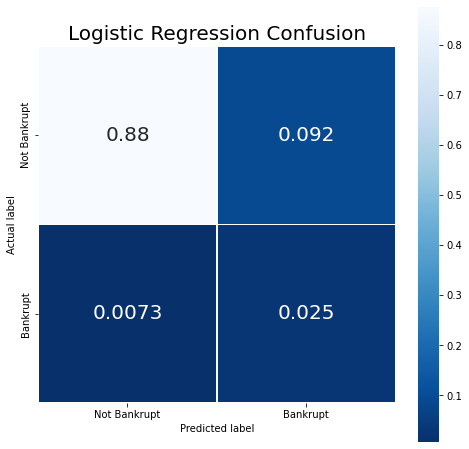

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#printing the confusion matrix
confusion_lr = metrics.confusion_matrix(y_test, y_pred_lr, normalize='all')
print("Normalized Confusion Matrix: ")
print(confusion_lr)

plt.figure(figsize=(8,8))
labels = ['Not Bankrupt', 'Bankrupt']
sns.heatmap(confusion_lr, annot=True, annot_kws={"size": 20}, linewidths = 0.5, square = True, cmap = 'Blues_r', xticklabels=labels, yticklabels=labels);
sns.set(font_scale=1.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Logistic Regression Confusion', size = 20);

# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

#using Perceptron to classify
classifier_pct = Perceptron(penalty='l2', random_state=0).fit(X_train, y_train)
y_pred_pct = classifier_pct.predict(X_test)
print("Perceptron Predictions: ")
print(y_pred_pct)
print("Length: ", len(y_pred_pct))

Perceptron Predictions: 
[1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0


In [ ]:
#calculating performance metrics
acc_pct = metrics.accuracy_score(y_test, y_pred_pct)
f1_pct = metrics.f1_score(y_test, y_pred_pct)
print("Perceptron Performance Metrics")
print(f"Accuracy score: {acc_pct}")
print(f"F1 score: {f1_pct}")

Perceptron Performance Metrics
Accuracy score: 0.7360703812316716
F1 score: 0.1964285714285714


Normalized Confusion Matrix: 
[[0.70381232 0.26392962]
 [0.         0.03225806]]


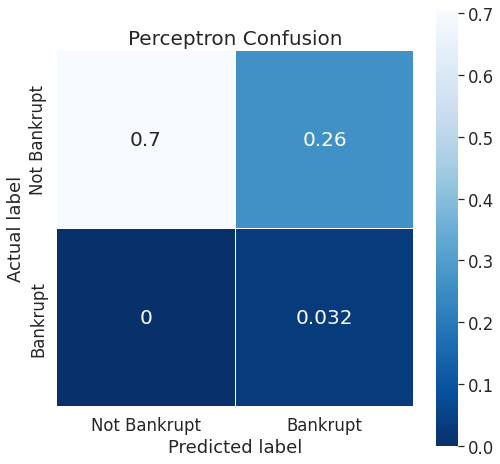

In [ ]:
#printing the confusion matrix
confusion_pct = metrics.confusion_matrix(y_test, y_pred_pct, normalize='all')
print("Normalized Confusion Matrix: ")
print(confusion_pct)

plt.figure(figsize=(8,8))
labels = ['Not Bankrupt', 'Bankrupt']
sns.heatmap(confusion_pct, annot=True, annot_kws={"size": 20}, linewidths = 0.5, square = True, cmap = 'Blues_r', xticklabels=labels, yticklabels=labels);
sns.set(font_scale=1.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Perceptron Confusion', size = 20);

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#using Naive Bayes to classify
classifier_nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)
print("Naive Bayes Predictions: ")
print(y_pred_nb)
print("Length: ", len(y_pred_nb))

Naive Bayes Predictions: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0

In [ ]:
#calculating performance metrics
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)
f1_nb = metrics.f1_score(y_test, y_pred_nb)
print("Naive Bayes Performance Metrics")
print(f"Accuracy score: {acc_nb}")
print(f"F1 score: {f1_nb}")

Naive Bayes Performance Metrics
Accuracy score: 0.9530791788856305
F1 score: 0.42857142857142855


Normalized Confusion Matrix: 
[[0.93548387 0.03225806]
 [0.01466276 0.01759531]]


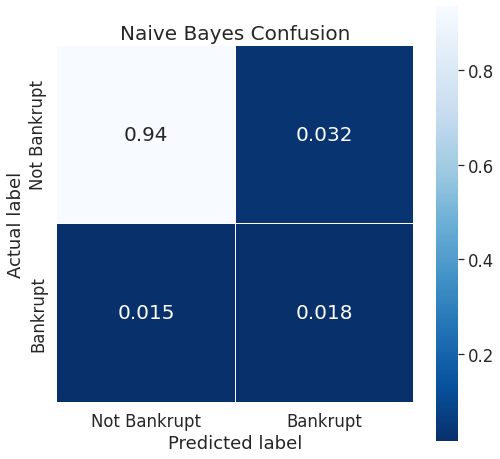

In [ ]:
#printing the confusion matrix
confusion_nb = metrics.confusion_matrix(y_test, y_pred_nb, normalize='all')
print("Normalized Confusion Matrix: ")
print(confusion_nb)

plt.figure(figsize=(8,8))
labels = ['Not Bankrupt', 'Bankrupt']
sns.heatmap(confusion_nb, annot=True, annot_kws={"size": 20}, linewidths = 0.5, square = True, cmap = 'Blues_r', xticklabels=labels, yticklabels=labels);
sns.set(font_scale=1.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Naive Bayes Confusion', size = 20);

# Support Vector Machine (SVM)


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.svm import SVC

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

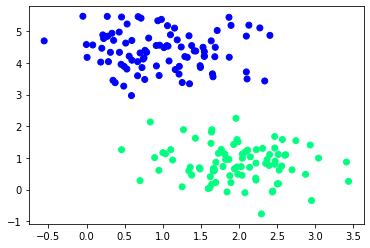

In [ ]:
#Simple illustration of how SVM works

X, y = make_blobs(n_samples = 200, centers =2, cluster_std=0.60, random_state =0)
train_X, test_X, train_y, test_t = train_test_split(X, y, test_size=20, random_state=0)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')
plt.show()

In [ ]:
svc = SVC(kernel='linear')
svc.fit(train_X, train_y)

SVC(kernel='linear')

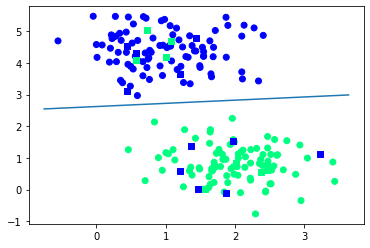

In [ ]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()

ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')

w= svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a* xx -(svc. intercept_[0]/ w[1])
plt.plot(xx, yy)
plt.show()

(5455,)
(5455,)
(5455,)


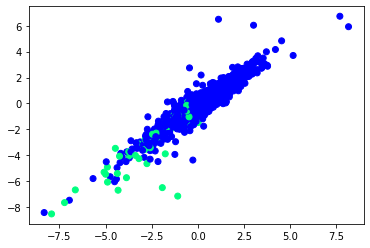

In [ ]:
#Visualization using feature 1 & feature 2

print(X_train[:, 0].shape)
print(X_train[:, 1].shape)
print(y_train.shape)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = 'winter')
plt.show()

[[666   0]
 [ 16   0]]


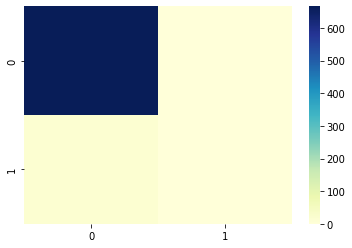

Accuracy score: 0.9765395894428153
f1 score: 0.0
[[665   1]
 [ 15   1]]


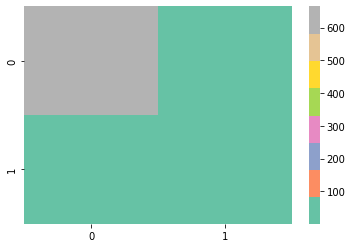

Accuracy score: 0.9765395894428153
f1 score: 0.1111111111111111
[[648  18]
 [ 16   0]]


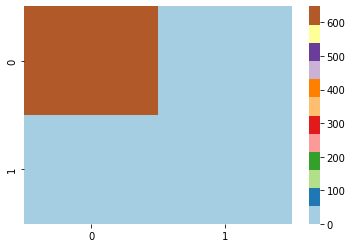

Accuracy score: 0.9501466275659824
f1 score: 0.0


In [ ]:
#Using kernel = 'linear'
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_hat = classifier.predict(X_test)
svm_cm = confusion_matrix(y_test, y_hat)
print(svm_cm)

sns.heatmap(svm_cm, cmap="YlGnBu")
plt.show()

svm_accuracy = accuracy_score(y_test, y_hat)

print(f"Accuracy score: {svm_accuracy}")
print("f1 score:", f1_score(y_test, y_hat))

#Using kernel='poly'
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

y_hat1 = classifier.predict(X_test)
svm_cm = confusion_matrix(y_test, y_hat1)
print(svm_cm)

sns.heatmap(svm_cm, cmap="Set2")
plt.show()

svm_accuracy = accuracy_score(y_test, y_hat1)
print(f"Accuracy score: {svm_accuracy}")
print("f1 score:", f1_score(y_test, y_hat1))

#Using kernel='sigmoid'
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

y_hat2 = classifier.predict(X_test)
svm_cm = confusion_matrix(y_test, y_hat2)
print(svm_cm)

sns.heatmap(svm_cm, cmap="Paired")
plt.show()

svm_accuracy = accuracy_score(y_test, y_hat2)
print(f"Accuracy score: {svm_accuracy}")
print("f1 score:", f1_score(y_test, y_hat2))




# Shallow Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 66        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=15)

Epoch 1/40
364/364 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9676 - val_loss: 0.0820 - val_accuracy: 0.9765
Epoch 2/40
364/364 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9674 - val_loss: 0.0827 - val_accuracy: 0.9751
Epoch 3/40
364/364 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.0822 - val_accuracy: 0.9751
Epoch 4/40
364/364 [==============================] - 3s 7ms/step - loss: 0.0908 - accuracy: 0.9676 - val_loss: 0.0825 - val_accuracy: 0.9751
Epoch 5/40
364/364 [==============================] - 2s 5ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.0822 - val_accuracy: 0.9751
Epoch 6/40
364/364 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9674 - val_loss: 0.0804 - val_accuracy: 0.9780
Epoch 7/40
364/364 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9676 - val_loss: 0.0807 - val_accuracy: 0.9780
Epoch 

[]

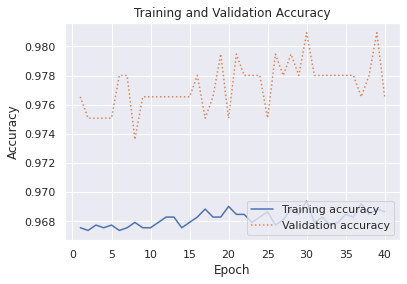

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

f1 score: 0.2


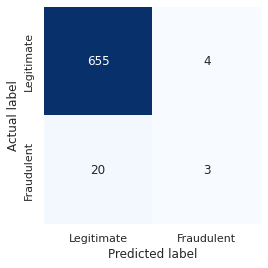

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')


# #confusion matrix:
# model_pred = model.predict(X_test)
# matrix = confusion_matrix(y_test, model_pred)
# confusion_matrix_average1 = confusion_matrix_average1 + matrix
# print(f"loop {i} classification report:", classification_report(y_test.argmax(axis=1), model_pred.argmax(axis=1)))

#evaluate the model:
tn, fp, fn, tp = mat.ravel()
f1_score = tp/ (tp+0.5*(fp+fn))
print("f1 score:", f1_score)
# list_scores_keras.append(f1_score)